Please wait while K-means is being calculated for Strategy 2. It takes time to compute as there are many iterations until it finally converges
Objective function is [1921.033485856205, 1293.7774523911357, 805.1166457472608, 592.0694342732751, 462.92635582483746, 396.4565140145377, 404.12682136949945, 241.43812287689647, 243.34420459493592]
Objective function values Initialization:1
K:[2, 3, 4, 5, 6, 7, 8, 9, 10]
J(K):[1921.033485856205, 1293.7774523911357, 805.1166457472608, 592.0694342732751, 462.92635582483746, 396.4565140145377, 404.12682136949945, 241.43812287689647, 243.34420459493592]




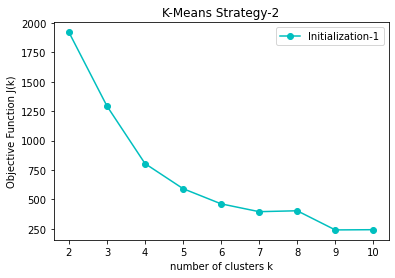

Objective function is [1921.033485856205, 1294.2984174853163, 803.514506197507, 654.8779090667977, 476.29657052696626, 399.68001855863355, 290.92433447443744, 241.43812287689647, 260.04019829095625]
Objective function values Initialization:2
K:[2, 3, 4, 5, 6, 7, 8, 9, 10]
J(K):[1921.033485856205, 1294.2984174853163, 803.514506197507, 654.8779090667977, 476.29657052696626, 399.68001855863355, 290.92433447443744, 241.43812287689647, 260.04019829095625]




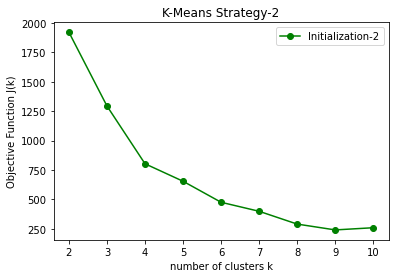

In [1]:
import scipy.io, numpy as np,random, sys,math, matplotlib.pyplot as plt
from scipy.spatial import distance

inputFile=scipy.io.loadmat("AllSamples.mat")['AllSamples']

inputFileDimensions = inputFile.shape

initialization = 0
x = 'c'

while initialization <= 1:
    J=[]
    for k in range(2,11):
        centers = []
        clustersCentroid={}
        clustersPoints={}
        newcenters = []
        randomGeneratorIndices = np.random.choice(inputFileDimensions[0],1,replace = False)
        centers.append(list(inputFile[randomGeneratorIndices][0]))
        
        #this is the differentiating part of the code where the centers are assigned based on strategy 2 (lines 145 to 159)
        while len(centers)<k:

            maximum = -sys.maxsize - 1
            maxCenter = -sys.maxsize - 1
            for i in inputFile:
                dist=0
                for j in centers:
                    if list(i) not in centers:

                        dist += distance.euclidean(i,j) # the distances to the previous i-1 centers is summed
                dist=dist/len(centers) # average value of sum of distances to previous i-1 centers is taken
                if dist>maximum:
                    maximum=dist
                    maxCenter = i
            centers.append(list(maxCenter)) # the point with maximum average distance to previous i-1 centers is chosen as the next center

        for i in range(len(randomGeneratorIndices)): #newcenters is initialized to None
            newcenters.append(None)
        newcenters = np.array(newcenters) # this is used for converting newcenters to numpy array for computation purposes
        count=1
        for center in centers:
            clustersCentroid["Cluster"+str(count)] = center
            count=count+1
        centers = np.array(centers) # this is used for converting centers to numpy array for computation purposes

        intermedList=[]
        for key,val in clustersCentroid.items():
            intermedList.append(list(val))
            clustersPoints[key] = intermedList
            intermedList=[]
        flag = False
        
        #the data points are assigned to clusters until the centroids don't change. The data points are assigned to the cluster with minimum euclidean distance from the respective point
        while not np.array_equal(centers,newcenters):  # the stopping condition for the algorithm to stop when the centers remain same and not change.
            if flag: # this is used for re-initializing the clusterpoints and clustercentroids for successive iterations until the algorithm converges
                clustersCentroid={}
                centers = newcenters
                count=1
                #this is used to store cluster centroid points to respective clusters
                for center in centers:
                    clustersCentroid["Cluster"+str(count)] = center
                    count=count+1
                clustersPoints={}
                intermedList=[]
                for key,val in clustersCentroid.items(): #this is used to assign centroid points to each and every cluster initially
                    intermedList.append(list(val))
                    clustersPoints[key] = intermedList
                    intermedList=[]
                    
            #lines 191 to 210 are used for assigning data points to respective clusters
            for data in inputFile:
                if data not in centers:
                    minimum = sys.maxsize
                    minCenter = sys.maxsize
                    for center in centers:
                        dist=distance.euclidean(data,center) #the data points are assigned to the cluster with the smallest euclidean distance.
                        if dist < minimum:
                            minimum = dist
                            minCenter = center
                    for key, val in clustersCentroid.items():
                        if list(val) == list(minCenter):
                            if key not in clustersPoints.keys():
                                dataPts = []
                                dataPts.append(list(data))
                                clustersPoints[key] = dataPts
                            else:
                                dataPts = clustersPoints[key]
                                dataPts.append(list(data))
                                clustersPoints[key]=dataPts
            newcenters=[]
            for key,val in clustersPoints.items(): # this is the code for updating the centers after assigning all the data points to the respective clusters
                res=np.mean(val,axis=0)
                newcenters.append(res)
            newcenters = np.array(newcenters) # this is used for converting newcenters to numpy array for computation purposes
            flag = True
        index = 0
        for key,val in clustersCentroid.items(): # this is for updating the clusterscentroid with new centers for successive iterations
            clustersCentroid[key] = centers[index]
            index+=1
        #code for calculating objective function
        sse = 0
        for key,val in clustersPoints.items():
            centerKeyVal = list(clustersCentroid.get(key))
            for value in val:
                sse+=math.pow(distance.euclidean(value,centerKeyVal),2)
        J.append(sse)
    #code for plotting graphs
    print("Objective function is %s" % J)
    K=[k for k in range(2,11)]
    plt.title("K-Means Strategy-2")
    l='Initialization-'+str(initialization+1)
    plt.ylabel('Objective Function J(k)')
    plt.xlabel('number of clusters k')
    plt.plot(K,J,x,marker='o',label=l)
    plt.legend()
    print("Objective function values Initialization:"+str(initialization+1))
    print("K:"+str(K))
    print("J(K):"+str(J))
    print("\n")
    plt.show()
    initialization+=1
    x='green'
plt.show()